In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [9]:
model = tf.keras.models.load_model('trained_model.keras')

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)            │ (None, 128, 128, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_22 (Conv2D)            │ (None, 126, 126, 32)  │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_8               │ (None, 63, 63, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_23 (Conv2D)            │ (None, 63, 63, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_24 (Conv2D)            │ (None, 61, 61, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_9               │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_25 (Conv2D)            │ (None, 30, 30, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_26 (Conv2D)            │ (None, 28, 28, 128)   │      147,584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_10              │ (None, 14, 14, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_27 (Conv2D)            │ (None, 14, 14, 256)   │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_28 (Conv2D)            │ (None, 12, 12, 256)   │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_11              │ (None, 6, 6, 256)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_29 (Conv2D)            │ (None, 6, 6, 512)     │    1,180,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_30 (Conv2D)            │ (None, 4, 4, 512)     │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_12              │ (None, 2, 2, 512)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 2, 2, 512)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_2 (Flatten)           │ (None, 2048)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 1500)          │    3,073,500 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 1500)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 38)            │       57,038 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

## visualize single image of test set

In [4]:
import cv2

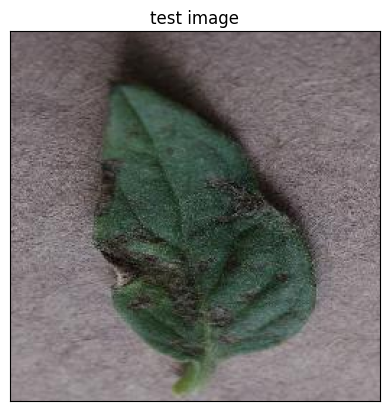

In [26]:
image_path = "test/test/TomatoEarlyBlight6.JPG"
#reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert bgr image to rgb



#display image
plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing model

In [27]:
from PIL import Image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)


(1, 128, 128, 3)


In [28]:
prediction = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


In [29]:
prediction,prediction.shape

(array([[5.0317913e-06, 5.2637028e-05, 1.3913633e-04, 9.4113610e-04,
         2.6400048e-05, 2.2435012e-04, 2.4504467e-05, 7.4348842e-05,
         6.6736828e-07, 3.2292388e-05, 2.4954991e-06, 1.3341734e-04,
         1.1179150e-04, 1.8257782e-05, 8.5753627e-06, 7.9583449e-05,
         8.4293621e-05, 7.3379852e-05, 1.3043969e-05, 1.7901805e-04,
         6.3307089e-06, 7.7688956e-04, 8.6342627e-03, 2.1237579e-04,
         2.1350093e-04, 2.0303740e-05, 3.3773067e-05, 9.2866194e-06,
         9.5728424e-04, 8.6019941e-02, 1.5925734e-03, 1.5930942e-04,
         5.6108878e-05, 3.5804263e-01, 5.3393084e-01, 1.4229034e-03,
         3.5463593e-03, 2.1409937e-03]], dtype=float32),
 (1, 38))

In [30]:
result_index = np.argmax(prediction)
result_index

np.int64(34)

In [31]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

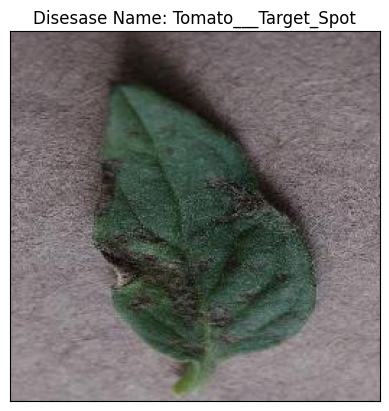

In [32]:
#display result
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disesase Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
